# Features API Example

This notebook shows how how to use the `features` library for fetching images and its accompanying `storage` library for storing/loading images from disk.

In [10]:
import sys
if '../' not in sys.path:
    sys.path.append("../")

import matplotlib.pyplot as plt
    
import features
import storage

%matplotlib inline

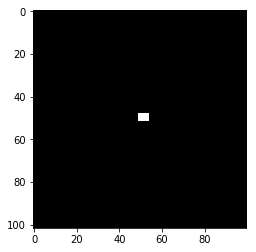

In [11]:
# Get 100x100 (approximately) binary image mining mask image centered at
# (lat, lon) at a resolution of 30 meters^2 per pixel.
lon = 29.6603299999999983072029863251373
lat = 1.0108900000000000662936372464173
image, metadata = features.get_image_patch(
    {"source": "mask"},
    center=(lon, lat),
    patch_size=100,
    meters_per_pixel=30)
image     # np.array of shape [102, 101]
metadata  # {}

plt.imshow(image, cmap="gray")

(102, 100, 11, 12)
{'bands': [u'B1', u'B2', u'B3', u'B4', u'B5', u'B6', u'B7', u'B8', u'B9', u'B10', u'B11'], 'dates': [u'20150101', u'20150202', u'20150306', u'20150407', u'20150509', u'20150610', u'20150712', u'20150813', u'20150914', u'20151016', u'20151117', u'20151219']}


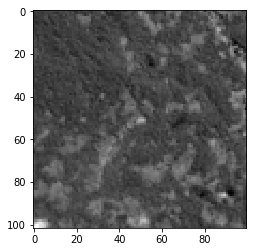

In [25]:
# Get Landsat 8 top-of-atmosphere images for all color bands, all dates
# available in 2015.
image, metadata = features.get_image_patch(
    {"source": "landsat8", "start_date": "2015-01-01", "end_date": "2016-01-01"},
    center=(lon, lat),
    patch_size=100,
    meters_per_pixel=30)
image     # np.array of shape [102, 101, 12, 2]
metadata  # {"bands": ["B1", "B2", ...], "dates": ["201501XX", ...]}

plt.imshow(image[:,:,5,5], cmap="gray")
print image.shape
print metadata

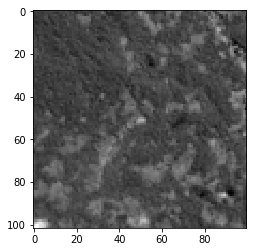

In [23]:
# Save the image to disk and load it again.

location_id = "loc0"
image_source_id = "landsat8"

# Open an on-disk image dataset (may not exist yet).
dataset = storage.DiskDataset("/tmp/mining_detection")

# Add a new image to the dataset. Images are indexed by location and image
# source (e.g. "landsat8"). Both are arbitrary strings.
dataset.add_image(location_id, image_source_id, image, metadata)

# pd.DataFrame listing all (location_id, image_source_id, metadata).
dataset.metadata

# np.array image.
image = dataset.load_image(location_id, image_source_id)
plt.imshow(image[:,:,5,5], cmap="gray")